________
<a id="top"></a>
# DS 7331 Data Mining: Lab 2 iPython Notebook
Created On: February 27, 2019
### Authors:  
- Arora, Tanvi                
- Chandna, Rajat
- Henderson Kuns, Nicol
- Ramasundaram, Kumar
- Vasquez, James


## Data Preparation Part 1

In [27]:
# Importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)


# To display plots inside the iPython Notebook itself
%matplotlib inline

In [28]:
# To verify how data is orgainzed in file(to find the delimiter) and then
# use corresponding function to open the file. eg
# data could be in .csv. .tsv, excel format etc.
pathOfDataFile = "data/bank-full.csv"
firstFewLines = list()
noOfLinesToView = 5

with open(pathOfDataFile) as dataFile:
    firstFewLines = [next(dataFile) for i in range(noOfLinesToView)]
    for line in firstFewLines:
        print(line)

"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"

58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"

44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"

33;"entrepreneur";"married";"secondary";"no";2;"yes";"yes";"unknown";5;"may";76;1;-1;0;"unknown";"no"

47;"blue-collar";"married";"unknown";"no";1506;"yes";"no";"unknown";5;"may";92;1;-1;0;"unknown";"no"



In [29]:
# Import the semi-colon delimited data file into pandas dataFrame
bankPromo_df = pd.read_csv(pathOfDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromo_df = bankPromo_df.rename(columns={"y":"Subscribed"})

bankPromo_df.head(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no


In [30]:
bankPromo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
housing       45211 non-null object
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
Subscribed    45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [31]:
bankPromo_df.isnull().any()

age           False
job           False
marital       False
education     False
default       False
balance       False
housing       False
loan          False
contact       False
day           False
month         False
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
Subscribed    False
dtype: bool

**As all the missing/unknown values in the dataset have been accounted already. Our dataset contains no missing values.**

In [32]:
# To find duplicated rows in data Frame
bankPromo_df.duplicated().any()

False

**There are no duplicate values for any observations/rows in our data set.**

In [33]:
# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars = list()
# List to hold names of numerical variables
numericalVars = list()

for colName in bankPromo_df.columns:
    if bankPromo_df[colName].dtype == np.int64:
        numericalVars.append(colName)
    elif bankPromo_df[colName].dtype == np.object:
        categoricalVars.append(colName)
    else:
        pass
    
# Remove Target column from final categorical Var list
categoricalVars.remove('Subscribed')

print(numericalVars)
print(categoricalVars)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


________________________________________________________________________________________________________
### Perform One Hot Encoding for categorical variables in dataset

In [34]:
# Make a copy of original data frame
bankPromoModel_Df = bankPromo_df.copy()
bankPromoModel_Df['Target'] = bankPromoModel_Df['Subscribed'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoModel_Df['Target'] = bankPromoModel_Df['Target'].astype(np.int)
# Delete the original 'Subscribed' column
del bankPromoModel_Df['Subscribed']





In [35]:
# Covert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoModel_Df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoModel_Df = pd.concat((bankPromoModel_Df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoModel_Df.drop(categoricalVars, inplace=True, axis=1)
bankPromoModel_Df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
Target                 45211 non-null int64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-null uint8
marital_sin

In [36]:
### Seperate the class and predictor variables
if 'Target' in bankPromoModel_Df:
    y = bankPromoModel_Df['Target'].values # get the labels we want
    del bankPromoModel_Df['Target']        # get rid of the class label
    X = bankPromoModel_Df.values  

### Feature Elimination Using Lasso Logistic Regression 

Although our dataset doesnot have very high dimensionality, we would try to eliminate any features that are not useful to our task of classification. For this purpose, we would reuse the grid parameters that we obtained during Mini Lab assignment on the same dataset and then using that model, choose which features could be eliminated. The Grid parameters were obtained after 5 Fold Shuffle Split CV process. This 5 Fold Shuffle Split CV process is ONLY done to obtain logistic model for feature elimination. Later, for all Model building and validation, a 10 Fold Shuffle Split/KFold cross validation method is used. 

contact_unknown has weight of -0.6596897542437438
housing_yes has weight of -0.3648448934465457
month_jul has weight of -0.31824024350843516
month_may has weight of -0.2585469923183746
campaign has weight of -0.25794574900642003
month_aug has weight of -0.24541639341612614
month_nov has weight of -0.21240910114442185
loan_yes has weight of -0.1802885241528189
month_jan has weight of -0.17436098419321414
job_blue-collar has weight of -0.09692056435904928
poutcome_unknown has weight of -0.08380073606519363
marital_married has weight of -0.07056652408825878
job_housemaid has weight of -0.041493284360618436
job_services has weight of -0.023760334821460786
job_entrepreneur has weight of -0.021160006000282547
job_self-employed has weight of -0.019973136844108882
job_unknown has weight of -0.003912328283641017
age has weight of 0.0
contact_telephone has weight of 0.0
default_yes has weight of 0.0
job_management has weight of 0.0
job_technician has weight of 0.0
job_unemployed has weight of 0.

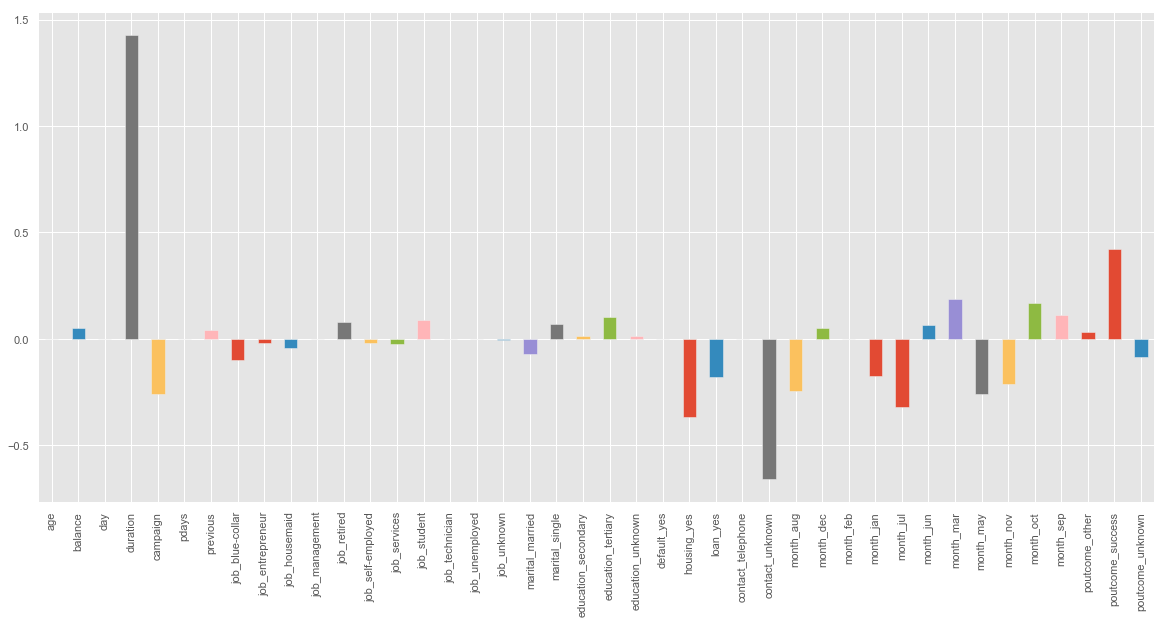

In [37]:
### Create a Logistic Lasso Model based upon Grid Search Parameters obtained in Mini Lab.
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

logisticModel = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', C=0.009102981779915217,\
                                                                   class_weight='balanced', random_state=999, \
                                                                   solver='liblinear'))
logisticModel.fit(X,y) 
classifier_model = logisticModel.named_steps['logisticregression']
# sort these attributes and spit them out
zip_vars = zip(classifier_model.coef_.T, bankPromoModel_Df.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0])

plt.style.use('ggplot')
plt.figure(figsize=(20,9))
weights = pd.Series(classifier_model.coef_[0],index=bankPromoModel_Df.columns)
weights.plot(kind='bar')
plt.show()

As seen above, from results of Lasso Logistic Model with degree = 1 that following features( with coff. = 0) can be eliminated. Next, we will explore them one by one:

age has weight of 0.0  
contact_telephone has weight of 0.0   
default_yes has weight of 0.0    
job_management has weight of 0.0     
job_technician has weight of 0.0    
job_unemployed has weight of 0.0   
month_feb has weight of 0.0     
pdays has weight of 0.0    


Out of the features selected for elimination: job_ related, month_ related and contact_ related variables are levels of categorical variables. And some of the levels of these categorical variables are also have been found important for the model. So, if we remove these levels then whole corresponding categorical variable and all its level would be requried to be removed. **But since many of the levels of these categorical variables have been identified as important, we would keep corresponding whole categorical variables with all levels. Next we look at remaining "age", "default" and pdays variables.**

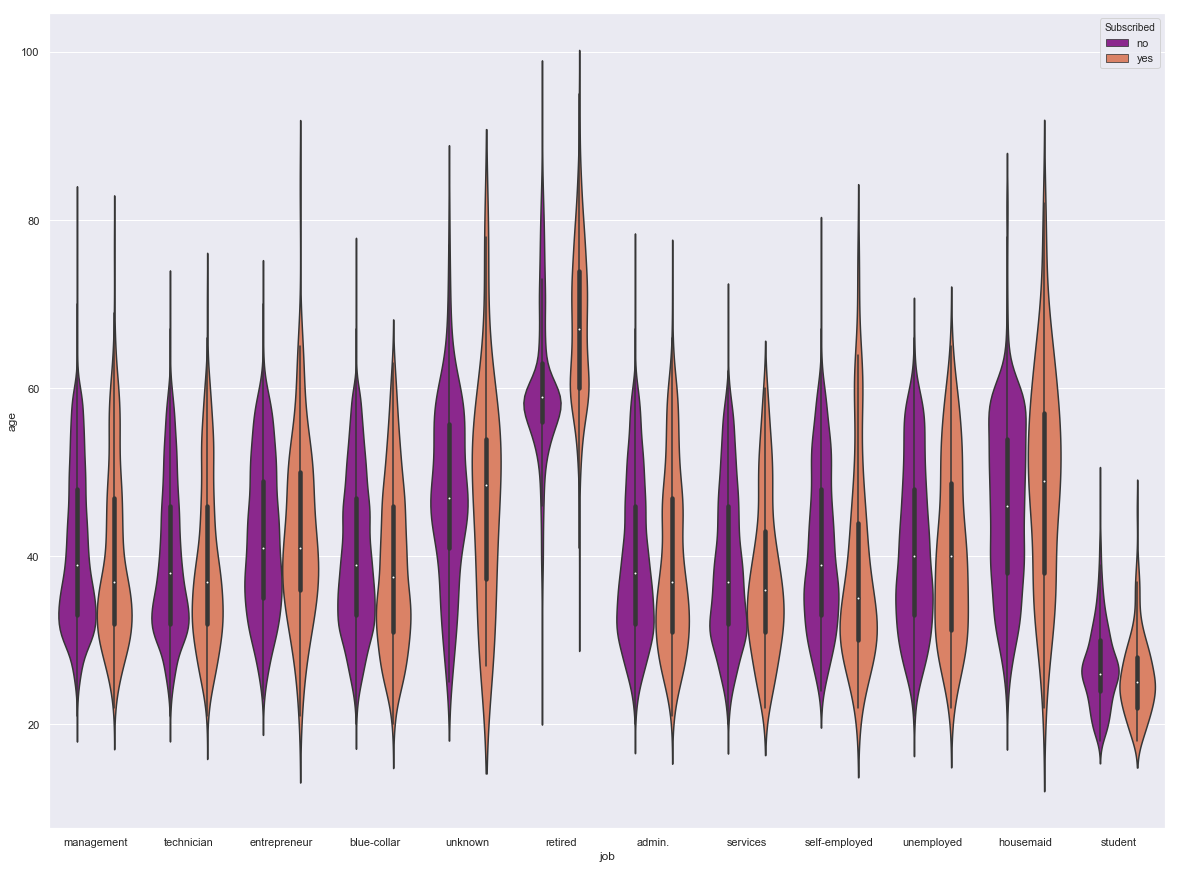

In [38]:
### Next we look at Age variable
sns.set(style="darkgrid")
fig1, ax_ageVar = plt.subplots(figsize = (20,15))
sns.violinplot(data = bankPromo_df, x = "job", y = "age", hue="Subscribed", \
               palette="plasma")

Although "age" has not been identified as an important feature by degree = 1 logistic lasso model( not covering feature interactions), our EDA reveals that there could be interaction between age and job variables with respect to class variable in that:
1. People who are retired from their job and have median age around 70 are more likely to subscribe to the promotion than group of retired people who have median age less than 60. This could very well be likely that as people get older they want to save more for inheritance purposes or for future medical expenditures.
2. Older housemaids are more likely to subscribe to the bank promotion than relatively younger housemaids.
3. Self employed people less than 40 years of age are more likely to subscribe to the promotion than people who are self employed but more than 40 years of age.

**Since such interactions would not have been captured by degree = 1 model, based on the EDA, we would keep "age" variable in our dataset**

Next we look at "default" variable    
In the realm of our business case, **we would keep "default" variable in our dataset** since based upon intuition, people who have defaulted would be less likely to open savings account because of their financial condition.

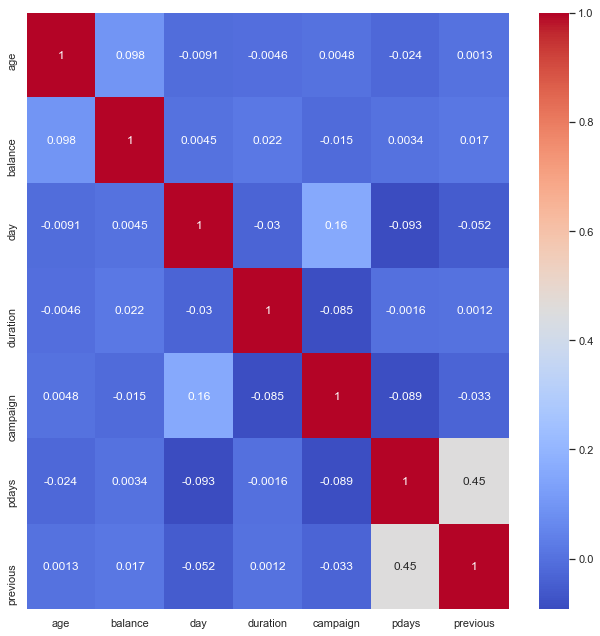

In [39]:
### Next we look at "pDays" variable
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(bankPromo_df.corr(), cmap="coolwarm", annot=True)
f.tight_layout()

As seen from above heatmap that "pDays" variable is moderately correlated with "previous" variable( r = 0.45) and our model predicts that this "pdays" variable is not important for our classification task, hence **we would eliminate this pDays variable from our dataset for model building.**

In [40]:
# Drop the pDays feature as it had high correlation with "previous" feature
del bankPromoModel_Df['pdays']


### Summary and Objectives tracking for section:  Data Preparation Part 1
Define and prepare your class variables.  
// "Subscribed" variable is identified and prepared as class variable.  

Use proper variable representations (int, float, one-hot, etc.).       
// As can be seen from above code, all the numericals variables have been appropriatly represented in the dataset and all categorical variables have been encoded using one-hot encoding.

Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc.      
// Scaling of the variables would be later performed before model preparation using pipeline which would first scale the variables before fitting them to model. Since, our data is not that high dimensional in feature space, hence no dimensionality reduction technique was performed. Rest all pre-processing was performed.      

Remove variables that are not needed/useful for the analysis.     
// Non important feature "pDays" was identified and eliminated using lasso shrinkage via logistic model.

## Data Preparation Part 2

In [42]:
bankPromoModel_Df.describe()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,0.580323,0.215257,0.032890,0.027427,0.209197,...,0.152507,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.040698,0.033421,0.817478
std,10.618762,3044.765829,8.322476,257.527812,3.098021,2.303441,0.411005,0.178351,0.163326,0.406740,...,0.359516,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.197592,0.179735,0.386278
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,275.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
bankPromoModel_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 41 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
previous               45211 non-null int64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-null uint8
marital_single         45211 non-null uint8
education_secondary    45211 non-null uint8
education_t

**So we would use above 41 predictors to create and validate our models; and variable "Subscribed" has been renamed to Target variable and would be used as class label.** The description of these variables is as:

- **Age** – Age is a numeric variable that ranges from ages 18-95 years.  
- **Job** – Job type is a categorical variable that entered the client into types of occupations.  The choices were: admin., unknown, unemployed, management, housemaid, entrepreneur, student, blue-collar, self-employed, retired, technician and services.  
- **Marital** – Marital status is a categorical variable that describes if the client is married, divorced or single.  For widowed clients, the bank has selected the divorced selection.
- **Education** – Education represents the client’s highest level of education.  The categorical variable has the following selections:  unknown, primary, secondary or tertiary.  Primary level is equivalent to the US elementary and middle school grades.  Secondary is similar to the US high school, but is split between more professional teachings versus vocations.  Tertiary level represents all level of higher education from special licenses, bachelors to post doctorate school (https://www.scholaro.com/pro/Countries/Portugal/Education-System).
- **Default** – Default represents if the client has defaulted in their credit history as a binary variable denoted with yes for default or no for no default.
- **Balance** – Balance is a numeric variable which signifies the yearly average balance in Euros.
- **Housing** – Housing is a binary variable which represents if the client has a home loan or not.  The selections are yes or no.
- **Loan** – Loan is similar to the housing variable except it represents if the client has a personal loan.
- **Contact** – Contact is a categorical variable describing the method of telecommunication between the bank and the client.  The selections are:  unknown, telephone or cellular.
- **Day** – Day is a numeric variable that represents the day of the month of the last contact.
- **Month** – Month is represented as a categorical variable where each month is denoted by the first three letters.  Every month of the year is represented.  The month corresponds to the last contact made with the client.
- **Duration** – Duration is the amount of time (a numeric variable) in seconds that the last contact with the client lasted.  This attribute is not the total time the clients were interviewed.     
- **Campaign** – Campaign is a numeric variable which represents the number of times the bank has contacted, using any method of communication, the client during this particular marketing campaign.
- **Previous** – Previous is a numeric variable that identifies the number of times a client has been involved with a marketing campaign with this bank prior to the current campaign. 
- **pOutcome** – pOutcome represents the outcome of a previous marketing campaign.  The categorical variable is identified by:  unknown, other, failure or success.  Each client that has not participated in a previous marketing campaign has been marked as unknown for pOutcome.
- **Subscribed** – Y signifies yes if the customer accepted a term deposit during the current marketing campaign.  The binary variable is defined as yes or no.  In the remaining portions of the report, this variable is denoted as subscribed with the results remaining as yes or no. 


### Summary and Objectives tracking for section:  Data Preparation Part 2
Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).    
// The final dataset that is to be used for classification in Task 1 has been described as above. No new variables were created for this analysis.

________________________________________________________________________________________________________
________________________________________________________________________________________________________
<a id="Perform8020split"></a>
<a href="#top">Back to Top</a>
### Create 10 Splits Stratified Cross Validation Object

In [9]:
# Training and Test Split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

         # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# To use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
num_cv_iterations = 10
stratified_cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state=999)
                         
print(stratified_cv_object)


StratifiedShuffleSplit(n_splits=10, random_state=999, test_size=0.2,
            train_size=None)


In [10]:
# Training and Test Split
from sklearn.model_selection import StratifiedKFold

if 'Target' in bankPromoModel_Df:
    y = bankPromoModel_Df['Target'].values # get the labels we want
    del bankPromoModel_Df['Target']        # get rid of the class label
    X = bankPromoModel_Df.values           # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# To use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
num_cv_iterations = 10
stratifiedKfold_cv_object = StratifiedKFold(n_splits=num_cv_iterations, random_state=999)
                         
print(stratifiedKfold_cv_object)


StratifiedKFold(n_splits=10, random_state=999, shuffle=False)


________________________________________________________________________________________________________
<a id="PrepTestData"></a>
<a href="#top">Back to Top</a>
### Getting ready Additional Test Dataset(with 10% instances) for final model fitting and evaluations 

In [11]:
pathOfAdditionalDataFile = "data/bank.csv"

# Import the semi-colon delimited data file into pandas dataFrame
bankPromoAdditional_df = pd.read_csv(pathOfAdditionalDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromoAdditional_df = bankPromoAdditional_df.rename(columns={"y":"Subscribed"})

bankPromoAdditional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age           4521 non-null int64
job           4521 non-null object
marital       4521 non-null object
education     4521 non-null object
default       4521 non-null object
balance       4521 non-null int64
housing       4521 non-null object
loan          4521 non-null object
contact       4521 non-null object
day           4521 non-null int64
month         4521 non-null object
duration      4521 non-null int64
campaign      4521 non-null int64
pdays         4521 non-null int64
previous      4521 non-null int64
poutcome      4521 non-null object
Subscribed    4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [12]:
bankPromoAdditional_df['Target'] = bankPromoAdditional_df['Subscribed'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoAdditional_df['Target'] = bankPromoAdditional_df['Target'].astype(np.int)
# Delete the original 'Subscribed' column
del bankPromoAdditional_df['Subscribed']

In [13]:
# Remove pDays
del bankPromoAdditional_df['pdays']

In [14]:
# Covert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoAdditional_df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoAdditional_df = pd.concat((bankPromoAdditional_df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoAdditional_df.drop(categoricalVars, inplace=True, axis=1)

if 'Target' in bankPromoAdditional_df:
    y_Final = bankPromoAdditional_df['Target'].values # get the labels we want
    del bankPromoAdditional_df['Target']        # get rid of the class label
    X_Final = bankPromoAdditional_df.values

bankPromoAdditional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 41 columns):
age                    4521 non-null int64
balance                4521 non-null int64
day                    4521 non-null int64
duration               4521 non-null int64
campaign               4521 non-null int64
previous               4521 non-null int64
job_blue-collar        4521 non-null uint8
job_entrepreneur       4521 non-null uint8
job_housemaid          4521 non-null uint8
job_management         4521 non-null uint8
job_retired            4521 non-null uint8
job_self-employed      4521 non-null uint8
job_services           4521 non-null uint8
job_student            4521 non-null uint8
job_technician         4521 non-null uint8
job_unemployed         4521 non-null uint8
job_unknown            4521 non-null uint8
marital_married        4521 non-null uint8
marital_single         4521 non-null uint8
education_secondary    4521 non-null uint8
education_tertiary     4521 non-n

________________________________________________________________________________________________________
<a id="CreateLRModel"></a>
<a href="#top">Back to Top</a>
# Create Model


________________________________________________________________________________________________________
<a id="SVMModel"></a>
<a href="#top">Back to Top</a>
### Simple SVM Model Fit

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run SVM model

svmModel = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='rbf', degree=3 , gamma='auto', random_state=999))
scores = cross_validate(svmModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

print()
display(pd.DataFrame(scores))

scores = cross_validate(svmModel, X, y=y, cv=stratifiedKfold_cv_object, n_jobs=-1, scoring=scoring)
display(pd.DataFrame(scores))

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,55.655538,28.516792,0.442489,0.536374,0.905848,0.943094,0.901913,0.917358,0.660413,0.780235,0.332703,0.408650
1,54.989474,28.344903,0.409762,0.533934,0.908474,0.942348,0.898374,0.917026,0.639279,0.778533,0.301512,0.406287
2,57.831162,27.725989,0.460468,0.522341,0.910840,0.942594,0.905673,0.916058,0.695985,0.781176,0.344045,0.392342
3,54.957947,28.522013,0.442467,0.534931,0.903748,0.942832,0.903019,0.917358,0.675728,0.782787,0.328922,0.406287
4,53.795391,28.434478,0.447059,0.526694,0.905101,0.943542,0.901250,0.916169,0.648115,0.775632,0.341210,0.398724
5,56.509414,29.262816,0.443450,0.525689,0.911227,0.940267,0.903682,0.916280,0.684418,0.779378,0.327977,0.396597
6,55.298781,29.035718,0.434286,0.535808,0.900787,0.944734,0.901471,0.917026,0.661509,0.775291,0.323251,0.409359
7,55.837866,28.560264,0.431423,0.527187,0.909024,0.941691,0.902355,0.916335,0.676768,0.777778,0.316635,0.398724
8,54.172382,29.124547,0.458831,0.529183,0.901194,0.943467,0.904788,0.916363,0.684803,0.774840,0.344991,0.401796
9,56.081962,28.785676,0.434069,0.529936,0.901098,0.942322,0.900807,0.916860,0.652751,0.782548,0.325142,0.400615


,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,72.692393,16.657345,0.026119,0.540348,0.889240,0.944899,0.884564,0.917545,1.000000,0.776684,0.013233,0.414286
1,86.225496,16.491693,0.007308,0.546727,0.370369,0.942571,0.819770,0.918823,0.010274,0.788287,0.005671,0.418487
2,72.248686,16.344367,0.051690,0.559631,0.455206,0.945343,0.788985,0.920324,0.054507,0.791699,0.049149,0.432773
3,74.360898,16.111067,0.050304,0.569840,0.393581,0.947252,0.757797,0.922045,0.046474,0.803749,0.054820,0.441387
4,78.356270,16.437903,0.144304,0.555252,0.580249,0.942971,0.850476,0.920079,0.218391,0.795455,0.107750,0.426471
5,75.180980,16.395351,0.197415,0.559253,0.503552,0.944690,0.848927,0.919931,0.260870,0.785334,0.158790,0.434244
6,73.451640,16.508562,0.166983,0.553717,0.575662,0.946234,0.805795,0.919145,0.167619,0.781394,0.166352,0.428782
7,64.951831,15.217808,0.032051,0.618125,0.208879,0.955003,0.398806,0.927820,0.019746,0.810986,0.085066,0.499370
8,75.757076,16.653758,0.260456,0.543772,0.609869,0.942091,0.827914,0.918801,0.261950,0.793312,0.258979,0.413655
9,62.609300,14.011630,0.292779,0.660222,0.723169,0.954828,0.525442,0.935219,0.177246,0.854521,0.840909,0.537912


In [16]:
# For class balance

svmModel = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='rbf', degree=3 , gamma='auto',class_weight="balanced", random_state=999))

scores = cross_validate(svmModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

scores = cross_validate(svmModel, X, y=y, cv=stratifiedKfold_cv_object, n_jobs=-1, scoring=scoring)
display(pd.DataFrame(scores))

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,118.315089,49.331777,0.565231,0.618541,0.917354,0.951077,0.842641,0.865295,0.417607,0.462475,0.874291,0.933585
1,101.520243,48.200910,0.574226,0.615540,0.918856,0.950382,0.850934,0.863470,0.431214,0.458957,0.859168,0.934294
2,103.282034,48.827918,0.563450,0.614334,0.923069,0.949960,0.844410,0.862530,0.419400,0.457222,0.858223,0.935949
3,117.060148,49.228378,0.569612,0.616824,0.922687,0.949735,0.850271,0.864106,0.429119,0.460214,0.846881,0.935004
4,113.326527,48.632739,0.557196,0.617228,0.916606,0.950806,0.840761,0.863996,0.412944,0.460093,0.856333,0.937367
5,117.258537,50.389180,0.575558,0.616045,0.926412,0.949458,0.850603,0.863968,0.431059,0.459863,0.865784,0.932876
6,117.455977,48.368057,0.565765,0.621253,0.912692,0.951827,0.847396,0.866567,0.424057,0.465045,0.849716,0.935476
7,102.337749,48.408551,0.569221,0.616609,0.922874,0.949332,0.845848,0.864189,0.422865,0.460319,0.870510,0.933585
8,118.717076,48.474779,0.567192,0.617201,0.918168,0.950508,0.848280,0.863775,0.425663,0.459722,0.849716,0.938785
9,102.868819,48.403255,0.561512,0.619668,0.919971,0.950812,0.843525,0.865904,0.417704,0.463678,0.856333,0.933822


,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,147.776237,27.077024,0.178082,0.616786,0.946716,0.951429,0.893852,0.863550,0.945455,0.459293,0.098299,0.938655
1,151.116418,27.721486,0.307592,0.619467,0.712601,0.951644,0.766033,0.866057,0.235235,0.463920,0.444234,0.931933
2,159.413859,26.348546,0.113909,0.625308,0.390318,0.953338,0.673081,0.869378,0.083406,0.470557,0.179584,0.931723
3,143.335058,26.676128,0.262554,0.624333,0.608382,0.954546,0.587481,0.868420,0.166000,0.468710,0.627599,0.934664
4,145.062169,27.206893,0.297000,0.621554,0.701712,0.953522,0.689007,0.866405,0.201903,0.464806,0.561437,0.937815
5,159.603554,26.693214,0.254057,0.623123,0.605245,0.952728,0.644105,0.867412,0.168305,0.466771,0.517958,0.936975
6,159.681345,26.464101,0.245283,0.622228,0.628616,0.952800,0.575315,0.866429,0.154839,0.464942,0.589792,0.940336
7,125.365524,23.556492,0.109536,0.649156,0.256386,0.960526,0.291528,0.880511,0.064211,0.494394,0.372401,0.944958
8,150.745773,27.725061,0.380363,0.613800,0.792081,0.951385,0.690113,0.862718,0.248268,0.457440,0.812854,0.932563
9,137.232299,23.469350,0.266058,0.686054,0.685050,0.963673,0.395796,0.899978,0.155027,0.542119,0.937500,0.934047


________________________________________________________________________________________________________
<a id="SVMRBF"></a>
<a href="#top">Back to Top</a>
### Tuning The Model Hyper Parameters for SVM Using Grid Search


In [20]:
########## Random Search SVM Model ############################

## Param Grid for SVM
param_grid = {
     'svc__kernel' : ['poly', 'rbf'],
    'svc__C' : np.logspace(-10, 2, 5),
    'svc__degree' : [1,2,3],
    'svc__gamma': np.logspace(-9, 3, 5)}

print(param_grid)

{'svc__kernel': ['poly', 'rbf'], 'svc__C': array([1.e-10, 1.e-07, 1.e-04, 1.e-01, 1.e+02]), 'svc__degree': [1, 2, 3], 'svc__gamma': array([1.e-09, 1.e-06, 1.e-03, 1.e+00, 1.e+03])}


In [21]:
from sklearn.model_selection import RandomizedSearchCV
#################################
# Random Search Training
#################################

# Use the random grid to search for best hyperparameters
# First create the base model to tune
SvmRandomGridEst = make_pipeline(StandardScaler(), SVC(random_state=999, class_weight = 'balanced')) 

# Random search of parameters, using 10 fold cross validation, 
# search across 200 different combinations, and use all available cores
svm_randomgrid = RandomizedSearchCV(estimator = SvmRandomGridEst, param_distributions = param_grid, 
                                   n_iter = 100, 
                                   cv = StratifiedShuffleSplit(n_splits=5, test_size  = 0.2, random_state=999),
                                   verbose=2, 
                                   random_state=999, 
                                   n_jobs = -1,
                                   scoring=scoring,
                                   refit='F1_Score', \
                                   return_train_score=True)


# Fit the random search model
svm_randomgrid.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (svm_randomgrid.best_params_, svm_randomgrid.best_score_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 40.4min


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

param_grid = {
     'svc__kernel' : ['poly', 'rbf'],
    'svc__C' : np.logspace(-10, 2, 5),
    'svc__degree' : [1,2,3],
    'svc__gamma': np.logspace(-9, 3, 5)}


# Create grid search object

grid = GridSearchCV(make_pipeline(StandardScaler(), SVC(class_weight='balanced', random_state=999)), \
                   param_grid = param_grid, cv = stratified_cv_object, \
                   verbose=False, n_jobs=-1, scoring=scoring, refit='F1_Score', \
                   return_train_score=True)

grid.fit(X, y=y)


print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

In [16]:
########## Random Forest ############################

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

baseRfModel = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1))
scores = cross_validate(baseRfModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))


,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,1.455259,0.670275,0.441088,0.963994,0.887794,0.999714,0.897711,0.991844,0.611390,0.996719,0.344991,0.933349
1,0.319000,0.543636,0.432030,0.968424,0.888017,0.999747,0.898817,0.992811,0.629295,0.996003,0.328922,0.942330
2,0.320733,0.543752,0.454159,0.962628,0.892616,0.999738,0.900586,0.991539,0.634975,0.995957,0.353497,0.931458
3,0.244978,0.540238,0.426980,0.964416,0.892466,0.999737,0.897600,0.991927,0.618280,0.995472,0.326087,0.935240
4,0.227350,0.539349,0.446301,0.967860,0.889007,0.999801,0.897379,0.992701,0.605178,0.997991,0.353497,0.939494
5,0.226471,0.538469,0.424090,0.965534,0.890089,0.999742,0.898485,0.992175,0.630597,0.995980,0.319471,0.936894
6,0.231513,0.540741,0.436881,0.970923,0.889342,0.999798,0.899370,0.993364,0.632616,0.996023,0.333648,0.947057
7,0.205409,0.540837,0.444170,0.965526,0.893627,0.999672,0.900365,0.992175,0.639432,0.996229,0.340265,0.936658
8,0.264353,0.538117,0.454600,0.969167,0.887864,0.999763,0.899701,0.992977,0.624793,0.996257,0.357278,0.943512
9,0.249046,0.541407,0.435474,0.965635,0.895221,0.999768,0.897932,0.992203,0.616984,0.996730,0.336484,0.936422


In [ ]:
from sklearn.ensemble import RandomForestClassifier

baseRfModel = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1, class_weight='balanced'))
scores = cross_validate(baseRfModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

baseRfModel = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1, class_weight='balanced_subsample'))
scores = cross_validate(baseRfModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

In [17]:
#################################
# Create randomized grid
#################################

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'log2', 8, 9, 10]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#Class weights
class_weight = ['balanced', 'balanced_subsample']

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'randomforestclassifier__n_estimators': n_estimators,
               'randomforestclassifier__max_features': max_features,
               'randomforestclassifier__max_depth': max_depth,
               'randomforestclassifier__min_samples_split': min_samples_split,
               'randomforestclassifier__min_samples_leaf': min_samples_leaf,
               'randomforestclassifier__class_weight': class_weight,
               'randomforestclassifier__bootstrap': bootstrap}

print(random_grid)

{'randomforestclassifier__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'randomforestclassifier__max_features': ['auto', 'log2', 8, 9, 10], 'randomforestclassifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'randomforestclassifier__min_samples_split': [2, 5, 10, 15], 'randomforestclassifier__min_samples_leaf': [1, 2, 4], 'randomforestclassifier__class_weight': ['balanced', 'balanced_subsample'], 'randomforestclassifier__bootstrap': [True, False]}


In [18]:
from sklearn.model_selection import RandomizedSearchCV
#################################
# Random Search Training
#################################

# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestClassifier() #Originally was this
rf = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_randomgrid = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                                   n_iter = 100, 
                                   cv = stratified_cv_object,
                                   verbose=2, 
                                   random_state=999, 
                                   n_jobs = -1,
                                   scoring=scoring,
                                   refit='F1_Score', \
                                   return_train_score=True)


# Fit the random search model
rf_randomgrid.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rf_randomgrid.best_params_, rf_randomgrid.best_score_))
#rf_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 45.7min finished


The best parameters are {'randomforestclassifier__n_estimators': 1200, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__max_depth': 50, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__bootstrap': False} with a score of 0.62


In [15]:
########################################################
# Create Smaller grid 1 based upon Random Grid CV results
#######################################################

# Number of trees in random forest
n_estimators = [1209, 1211, 1213, 1207]

# Number of features to consider at every split
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [49,51]

# Minimum number of samples required to split a node
min_samples_split = [3,4,17]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2,4,6]

#Class weights
class_weight = ['balanced']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
subGrid = {'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__max_depth': max_depth,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
        'randomforestclassifier__class_weight': class_weight,
        'randomforestclassifier__bootstrap': bootstrap}

print(subGrid)


{'randomforestclassifier__n_estimators': [1209, 1211, 1213, 1207], 'randomforestclassifier__max_features': ['auto'], 'randomforestclassifier__max_depth': [49, 51], 'randomforestclassifier__min_samples_split': [3, 4, 17], 'randomforestclassifier__min_samples_leaf': [2, 4, 6], 'randomforestclassifier__class_weight': ['balanced'], 'randomforestclassifier__bootstrap': [False]}


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#################################
# Sub Grid Search
#################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

rfSubGridEstimator = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

rfSubGridModel = GridSearchCV(estimator = rfSubGridEstimator, 
                              param_grid= subGrid,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
rfSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rfSubGridModel.best_params_, rfSubGridModel.best_score_))


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 47.4min finished


The best parameters are {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 49, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 17, 'randomforestclassifier__n_estimators': 1209} with a score of 0.61


In [17]:
########################################################
# Create Smaller grid 2 based upon Random Grid CV results
#######################################################

# Number of trees in random forest
n_estimators = [1190, 1175, 1150, 1125]

# Number of features to consider at every split
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [45,55]

# Minimum number of samples required to split a node
min_samples_split = [2,25,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [11,12,14]

#Class weights
class_weight = ['balanced']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
subGrid = {'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__max_depth': max_depth,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
        'randomforestclassifier__class_weight': class_weight,
        'randomforestclassifier__bootstrap': bootstrap}

print(subGrid)

{'randomforestclassifier__n_estimators': [1190, 1175, 1150, 1125], 'randomforestclassifier__max_features': ['auto'], 'randomforestclassifier__max_depth': [45, 55], 'randomforestclassifier__min_samples_split': [2, 25, 30], 'randomforestclassifier__min_samples_leaf': [11, 12, 14], 'randomforestclassifier__class_weight': ['balanced'], 'randomforestclassifier__bootstrap': [False]}


In [18]:
#################################
# Sub Grid Search
#################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

rfSubGridEstimator = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

rfSubGridModel = GridSearchCV(estimator = rfSubGridEstimator, 
                              param_grid= subGrid,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
rfSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rfSubGridModel.best_params_, rfSubGridModel.best_score_))

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 41.4min finished


The best parameters are {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 45, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 11, 'randomforestclassifier__min_samples_split': 25, 'randomforestclassifier__n_estimators': 1190} with a score of 0.58


In [15]:
########################################################
# Create Smaller grid 3 based upon Random Grid CV results
#######################################################

# Number of trees in random forest
n_estimators = [1192, 1194, 1196, 1198]

# Number of features to consider at every split
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [48,50]

# Minimum number of samples required to split a node
min_samples_split =  [9,11,13]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,4,7]

#Class weights
class_weight = ['balanced']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
subGrid = {'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__max_depth': max_depth,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
        'randomforestclassifier__class_weight': class_weight,
        'randomforestclassifier__bootstrap': bootstrap}

print(subGrid)



{'randomforestclassifier__n_estimators': [1192, 1194, 1196, 1198], 'randomforestclassifier__max_features': ['auto'], 'randomforestclassifier__max_depth': [48, 50], 'randomforestclassifier__min_samples_split': [9, 11, 13], 'randomforestclassifier__min_samples_leaf': [1, 4, 7], 'randomforestclassifier__class_weight': ['balanced'], 'randomforestclassifier__bootstrap': [False]}


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#################################
# Sub Grid Search
#################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

rfSubGridEstimator = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

rfSubGridModel = GridSearchCV(estimator = rfSubGridEstimator, 
                              param_grid= subGrid,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
rfSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rfSubGridModel.best_params_, rfSubGridModel.best_score_))



Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 122.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 273.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 491.4min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 548.5min finished


The best parameters are {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 48, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 13, 'randomforestclassifier__n_estimators': 1196} with a score of 0.61


In [17]:
########################################################
# Create Smaller grid 4 based upon Random Grid CV results
#######################################################

# Number of trees in random forest
n_estimators = [1210, 1225, 1250, 1275]

# Number of features to consider at every split
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [49,51]

# Minimum number of samples required to split a node
min_samples_split = [5,15,20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [8,9,10]

#Class weights
class_weight = ['balanced']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
subGrid = {'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__max_depth': max_depth,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
        'randomforestclassifier__class_weight': class_weight,
        'randomforestclassifier__bootstrap': bootstrap}

print(subGrid)


{'randomforestclassifier__n_estimators': [1210, 1225, 1250, 1275], 'randomforestclassifier__max_features': ['auto'], 'randomforestclassifier__max_depth': [49, 51], 'randomforestclassifier__min_samples_split': [5, 15, 20], 'randomforestclassifier__min_samples_leaf': [8, 9, 10], 'randomforestclassifier__class_weight': ['balanced'], 'randomforestclassifier__bootstrap': [False]}


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#################################
# Sub Grid Search
#################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

rfSubGridEstimator = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

rfSubGridModel = GridSearchCV(estimator = rfSubGridEstimator, 
                              param_grid= subGrid,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
rfSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rfSubGridModel.best_params_, rfSubGridModel.best_score_))


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 71.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 165.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 296.8min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 336.1min finished


The best parameters are {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 49, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 8, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 1250} with a score of 0.59


In [20]:
########################################################
# Create Smaller grid 5 based upon Random Grid CV results
#######################################################

# Number of trees in random forest
n_estimators = [1202, 1204, 1206, 1208]

# Number of features to consider at every split
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [50,52]

# Minimum number of samples required to split a node
min_samples_split = [8,10,12]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3]

#Class weights
class_weight = ['balanced']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
subGrid = {'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__max_depth': max_depth,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
        'randomforestclassifier__class_weight': class_weight,
        'randomforestclassifier__bootstrap': bootstrap}

print(subGrid)


{'randomforestclassifier__n_estimators': [1202, 1204, 1206, 1208], 'randomforestclassifier__max_features': ['auto'], 'randomforestclassifier__max_depth': [50, 52], 'randomforestclassifier__min_samples_split': [8, 10, 12], 'randomforestclassifier__min_samples_leaf': [1, 2, 3], 'randomforestclassifier__class_weight': ['balanced'], 'randomforestclassifier__bootstrap': [False]}


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#################################
# Sub Grid Search
#################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

rfSubGridEstimator = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

rfSubGridModel = GridSearchCV(estimator = rfSubGridEstimator, 
                              param_grid= subGrid,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
rfSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rfSubGridModel.best_params_, rfSubGridModel.best_score_))



Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed: 85.8min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 100.5min finished


The best parameters are {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 50, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 1206} with a score of 0.62


In [15]:
#### Start XGBoost ####
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

#class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, 
#                            silent=True, objective='binary:logistic', booster='gbtree', n_jobs=1,
#                            nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1,
#                            colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
#                            scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

xgb_baseModel = XGBClassifier(n_jobs=-1, random_state=999)
scores = cross_validate(xgb_baseModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)
display(pd.DataFrame(scores))

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,4.025203,0.151332,0.477972,0.497419,0.922039,0.930914,0.904346,0.908483,0.661102,0.695541,0.374291,0.387143
1,4.101233,0.154657,0.460695,0.512528,0.921989,0.931250,0.902134,0.910169,0.648370,0.701726,0.357278,0.403687
2,4.063951,0.146239,0.507126,0.489957,0.924644,0.930365,0.908216,0.907321,0.682109,0.687740,0.403592,0.380525
3,4.000041,0.149143,0.469660,0.500827,0.924256,0.931075,0.903351,0.908179,0.655932,0.687861,0.365784,0.393760
4,4.014683,0.154794,0.483568,0.504308,0.920983,0.930557,0.902687,0.909340,0.637771,0.699664,0.389414,0.394233
5,4.052266,0.157335,0.483557,0.500831,0.928431,0.929023,0.906226,0.908676,0.679795,0.694468,0.375236,0.391633
6,4.106057,0.189946,0.457846,0.509183,0.919940,0.930568,0.902577,0.909119,0.656085,0.691403,0.351607,0.402978
7,4.187747,0.496969,0.479369,0.498946,0.920590,0.930127,0.905120,0.907985,0.669492,0.687267,0.373346,0.391633
8,4.025992,0.178348,0.483262,0.506100,0.918979,0.930944,0.906115,0.909340,0.678632,0.697674,0.375236,0.397069
9,4.079530,0.221586,0.476190,0.502187,0.920090,0.930367,0.902687,0.908731,0.643087,0.693750,0.378072,0.393524


In [18]:
print("Mean Test F1 Score is = %s" %(pd.DataFrame(scores)['test_F1_Score'].mean()))
print("Mean Test AuC Score is = %s" %(pd.DataFrame(scores)['test_AUC'].mean()))

Mean Test F1 Score is = 0.47792456227059743
Mean Test AuC Score is = 0.922194100943049


In [23]:
xgb_baseModel = XGBClassifier(scale_pos_weight=8.1, n_jobs=-1, random_state=999)
scores = cross_validate(xgb_baseModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)
display(pd.DataFrame(scores))

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,4.043031,0.149193,0.543353,0.557144,0.921778,0.931585,0.825279,0.832974,0.391341,0.403826,0.888469,0.898133
1,4.014781,0.153247,0.545940,0.560024,0.921678,0.930971,0.830587,0.834826,0.397668,0.406762,0.870510,0.898606
2,4.053403,0.155691,0.548719,0.562114,0.925275,0.930845,0.830477,0.835490,0.398461,0.408144,0.880907,0.902623
3,4.134042,0.156038,0.553773,0.560076,0.925054,0.931077,0.833905,0.834384,0.403813,0.406287,0.880907,0.901205
4,4.134649,0.152411,0.541239,0.560265,0.921683,0.931789,0.827159,0.834771,0.392507,0.406774,0.871456,0.899787
5,4.042094,0.149159,0.554706,0.557795,0.929298,0.930561,0.832578,0.833195,0.402647,0.404271,0.891304,0.899315
6,4.102548,0.157037,0.549985,0.559641,0.920745,0.931742,0.832246,0.834439,0.400778,0.406213,0.876181,0.899315
7,4.151030,0.301366,0.550415,0.561256,0.921749,0.931936,0.832357,0.835435,0.401037,0.407820,0.877127,0.899787
8,4.046067,0.157308,0.544091,0.561243,0.919352,0.931627,0.831914,0.835296,0.398506,0.407661,0.857278,0.900496
9,4.134145,0.165621,0.548662,0.560898,0.921496,0.931482,0.830255,0.835628,0.398207,0.407929,0.881853,0.897424


In [22]:
print("Mean Test F1 Score is = %s" %(pd.DataFrame(scores)['test_F1_Score'].mean()))
print("Mean Test AuC Score is = %s" %(pd.DataFrame(scores)['test_AUC'].mean()))

Mean Test F1 Score is = 0.5429942674369973
Mean Test AuC Score is = 0.922680895061984


In [24]:
#####################################################################################
# Create randomized grid for Boosting Params only for now with default tree params
#####################################################################################

# Number of boosted trees to fit.
n_estimators = [int(x) for x in np.arange(10, 1000, 20)]

# Boosting learning rate (xgb’s “eta”)
learning_rate = [x for x in np.arange(0.05, 3, 0.05)]


# Create the random grid for boosting params
random_grid_boosting = {'n_estimators': n_estimators,
              'learning_rate': learning_rate}

print(random_grid_boosting)

{'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510, 530, 550, 570, 590, 610, 630, 650, 670, 690, 710, 730, 750, 770, 790, 810, 830, 850, 870, 890, 910, 930, 950, 970, 990], 'learning_rate': [0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.6500000000000001, 0.7000000000000001, 0.7500000000000001, 0.8, 0.8500000000000001, 0.9000000000000001, 0.9500000000000001, 1.0, 1.05, 1.1, 1.1500000000000001, 1.2000000000000002, 1.2500000000000002, 1.3, 1.35, 1.4000000000000001, 1.4500000000000002, 1.5000000000000002, 1.55, 1.6, 1.6500000000000001, 1.7000000000000002, 1.7500000000000002, 1.8, 1.85, 1.9000000000000001, 1.9500000000000002, 2.0, 2.05, 2.1, 2.15, 2.1999999999999997, 2.25, 2.3, 2.35, 2.4, 2.45, 2.5, 2.55, 2.6, 2.65, 2.7, 2.75, 2.8, 2.85, 2.9, 2.95]}


In [25]:
# Finding optimal value of n_estimators param based upon leaning rate
from sklearn.model_selection import RandomizedSearchCV
#################################
# Random Search Training
#################################

# Use the random grid to search for best hyperparameters for Boosting while keeping tree 
# parameters to default values

xgbEstimator = XGBClassifier(scale_pos_weight=8.1, n_jobs=-1, random_state=999)

# Perform Random Grid search using Stratified Shuffle Split CV Object.
xgb_randomgrid = RandomizedSearchCV(estimator = xgbEstimator, param_distributions = random_grid_boosting, 
                                   n_iter = 250, 
                                   cv = stratified_cv_object,
                                   verbose=2, 
                                   random_state=999, 
                                   n_jobs = -1,
                                   scoring=scoring,
                                   refit='F1_Score', \
                                   return_train_score=True)


# Fit the random search model
xgb_randomgrid.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgb_randomgrid.best_params_, xgb_randomgrid.best_score_))

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 885 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 1857 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 31.6min finished


The best parameters are {'n_estimators': 510, 'learning_rate': 0.45} with a score of 0.60


In [26]:
## Running Grid Search for boosting parameters in vicinity of values found during Random Grid Search
# Number of boosted trees to fit.

n_estimators = [int(x) for x in np.arange(495, 526, 3)]

# Boosting learning rate (xgb’s “eta”)
learning_rate = [x for x in np.arange(0.30, 0.51, 0.02)]


# Create the random grid for boosting params
sub_grid_boosting = {'n_estimators': n_estimators,
              'learning_rate': learning_rate}

print(sub_grid_boosting)

{'n_estimators': [495, 498, 501, 504, 507, 510, 513, 516, 519, 522, 525], 'learning_rate': [0.3, 0.32, 0.34, 0.36000000000000004, 0.38000000000000006, 0.4000000000000001, 0.4200000000000001, 0.4400000000000001, 0.46000000000000013, 0.48000000000000015, 0.5000000000000002]}


In [28]:
######################################
# Sub Grid Search for boosting params
######################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

xgbSubGridEstimator = XGBClassifier(scale_pos_weight=8.1, n_jobs=-1, random_state=999)

xgbSubGridModel = GridSearchCV(estimator = xgbSubGridEstimator, 
                              param_grid = sub_grid_boosting,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
xgbSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgbSubGridModel.best_params_, xgbSubGridModel.best_score_))

Fitting 10 folds for each of 121 candidates, totalling 1210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 885 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 1210 out of 1210 | elapsed: 18.1min finished


The best parameters are {'learning_rate': 0.4400000000000001, 'n_estimators': 519} with a score of 0.60


In [29]:
########################################################################################
# Create randomized grid for 2 Important Tree Params using Boosting Params obtained 
# via Grid Search
########################################################################################

# Maximum tree depth for base learners.
max_depth = [int(x) for x in np.arange(3, 11)]

# Minimum sum of instance weight(hessian) needed in a child.
min_child_weight = [int(x) for x in np.arange(1, 7)]


# Create the random grid for boosting params
sub_grid_tree = {'max_depth': max_depth,
              'min_child_weight': min_child_weight}

print(sub_grid_tree)

{'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1, 2, 3, 4, 5, 6]}


In [30]:
############################################################
# Sub Grid Search for 2max_depth and min_child_weight params
############################################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

xgbSubGridEstimator = XGBClassifier(learning_rate = 0.44, n_estimators = 519, scale_pos_weight=8.1, n_jobs=-1, random_state=999)

xgbSubGridModel = GridSearchCV(estimator = xgbSubGridEstimator, 
                              param_grid = sub_grid_tree,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
xgbSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgbSubGridModel.best_params_, xgbSubGridModel.best_score_))

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 13.3min finished


The best parameters are {'max_depth': 4, 'min_child_weight': 5} with a score of 0.60


In [32]:
## Tune gamma parameter value
gamma_vals = {
 'gamma':[i/20.0 for i in range(0,11)]
}

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

xgbSubGridEstimator = XGBClassifier(learning_rate = 0.44, n_estimators = 519, scale_pos_weight=8.1, max_depth = 4, \
                                    min_child_weight = 5, n_jobs=-1, random_state=999)

xgbSubGridModel = GridSearchCV(estimator = xgbSubGridEstimator, 
                              param_grid = gamma_vals,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
xgbSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgbSubGridModel.best_params_, xgbSubGridModel.best_score_))


Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:  1.2min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:  2.1min remaining:   19.7s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:  2.1min finished


The best parameters are {'gamma': 0.1} with a score of 0.60


In [33]:
## Tune Subsample and colsample_bytree tree params
param_test_2vars = {
 'subsample':[i/10.0 for i in range(3,11)],
 'colsample_bytree':[i/10.0 for i in range(3,11)]
}

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

xgbSubGridEstimator = XGBClassifier(learning_rate = 0.44, n_estimators = 519, scale_pos_weight=8.1, max_depth = 4, \
                                    min_child_weight = 5, gamma = 0.1, n_jobs=-1, random_state=999)

xgbSubGridModel = GridSearchCV(estimator = xgbSubGridEstimator, 
                              param_grid = param_test_2vars,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
xgbSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgbSubGridModel.best_params_, xgbSubGridModel.best_score_))

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 10.5min finished


The best parameters are {'colsample_bytree': 0.7, 'subsample': 1.0} with a score of 0.60


In [34]:
# Tune the Regularization Param - L1 Penalty
param_test_regularization = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100,300]
}

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

xgbSubGridEstimator = XGBClassifier(learning_rate = 0.44, n_estimators = 519, scale_pos_weight=8.1, max_depth = 4, \
                                    min_child_weight = 5, gamma = 0.1, colsample_bytree = 0.7, subsample = 1,\
                                    n_jobs=-1, random_state=999)

xgbSubGridModel = GridSearchCV(estimator = xgbSubGridEstimator, 
                              param_grid = param_test_regularization,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
xgbSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgbSubGridModel.best_params_, xgbSubGridModel.best_score_))

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  60 | elapsed:   43.6s remaining:   57.0s
[Parallel(n_jobs=-1)]: Done  57 out of  60 | elapsed:   49.9s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   50.4s finished


The best parameters are {'reg_alpha': 1e-05} with a score of 0.60


In [36]:
# Tune the Regularization Param further

param_test_regularization = {
 'reg_alpha':[0.0001, 0.00001, 0.00005, 0.000025, 0.00000001]
}

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

xgbSubGridEstimator = XGBClassifier(learning_rate = 0.44, n_estimators = 519, scale_pos_weight=8.1, max_depth = 4, \
                                    min_child_weight = 5, gamma = 0.1, colsample_bytree = 0.7, subsample = 1,\
                                    n_jobs=-1, random_state=999)

xgbSubGridModel = GridSearchCV(estimator = xgbSubGridEstimator, 
                              param_grid = param_test_regularization,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
xgbSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgbSubGridModel.best_params_, xgbSubGridModel.best_score_))

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  50 | elapsed:   47.8s remaining:   40.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   49.5s finished


The best parameters are {'reg_alpha': 2.5e-05} with a score of 0.60


In [38]:
## Tune Boosting Params again Now as final step

# Number of boosted trees to fit.
n_estimators = [int(x) for x in np.arange(10, 2000, 20)]

# Boosting learning rate (xgb’s “eta”)
learning_rate = [x for x in np.arange(0.05, 3, 0.05)]


# Create the random grid for boosting params
random_grid_boosting = {'n_estimators': n_estimators,
              'learning_rate': learning_rate}



In [40]:
#### Random Parallel Grid Search for XgBoost ######
# Number of boosted trees to fit.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.arange(10, 1000, 20)]

# Boosting learning rate (xgb’s “eta”)
learning_rate = [x for x in np.arange(0.05, 5, 0.05)]


# Create the random grid for boosting params
random_grid_boosting = {'n_estimators': n_estimators,
              'learning_rate': learning_rate}

xgbEstimator = XGBClassifier( scale_pos_weight=8.1, max_depth = 4, \
                              min_child_weight = 5, gamma = 0.1, colsample_bytree = 0.7, subsample = 1,\
                              reg_alpha = 0.000025, n_jobs=-1, random_state=999)

# Perform Random Grid search using Stratified Shuffle Split CV Object.
xgb_randomgrid = RandomizedSearchCV(estimator = xgbEstimator, param_distributions = random_grid_boosting, 
                                   n_iter = 250, 
                                   cv = stratified_cv_object,
                                   verbose=2, 
                                   random_state=999, 
                                   n_jobs = -1,
                                   scoring=scoring,
                                   refit='F1_Score', \
                                   return_train_score=True)


# Fit the random search model
xgb_randomgrid.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgb_randomgrid.best_params_, xgb_randomgrid.best_score_))

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 885 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 1857 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 28.2min finished


The best parameters are {'n_estimators': 710, 'learning_rate': 0.2} with a score of 0.61


In [41]:
#### Random Grid Search for XGBoost

# Number of boosted trees to fit.
n_estimators = [int(x) for x in np.arange(10, 1000, 20)]

# Boosting learning rate (xgb’s “eta”)
learning_rate = [x for x in np.arange(0.05, 3, 0.05)]

# Maximum tree depth for base learners.
max_depth = [int(x) for x in np.arange(2, 9)]

# Minimum sum of instance weight(hessian) needed in a child.
min_child_weight = [int(x) for x in np.arange(1, 9)]

gamma = [i/20.0 for i in range(0,7)]

subsample  = [i/10.0 for i in range(5,11)]

colsample_bytree = [i/10.0 for i in range(5,11)]

reg_alpha = [0.0001, 0.00001, 0.00005, 0.000025]

scale_pos_weight = [7.5, 8.0, 8.5, 9.0, 9.5, 10]

# Create the random grid for all params
sub_grid_tree = {'max_depth': max_depth,
                 'min_child_weight': min_child_weight,
                 'n_estimators' : n_estimators,
                'learning_rate': learning_rate, 
                'gamma': gamma, 
                'subsample': subsample,
                 'colsample_bytree': colsample_bytree,
                 'reg_alpha': reg_alpha,
                 'scale_pos_weight': scale_pos_weight
                }

print(sub_grid_tree)

{'max_depth': [2, 3, 4, 5, 6, 7, 8], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8], 'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510, 530, 550, 570, 590, 610, 630, 650, 670, 690, 710, 730, 750, 770, 790, 810, 830, 850, 870, 890, 910, 930, 950, 970, 990], 'learning_rate': [0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.6500000000000001, 0.7000000000000001, 0.7500000000000001, 0.8, 0.8500000000000001, 0.9000000000000001, 0.9500000000000001, 1.0, 1.05, 1.1, 1.1500000000000001, 1.2000000000000002, 1.2500000000000002, 1.3, 1.35, 1.4000000000000001, 1.4500000000000002, 1.5000000000000002, 1.55, 1.6, 1.6500000000000001, 1.7000000000000002, 1.7500000000000002, 1.8, 1.85, 1.9000000000000001, 1.9500000000000002, 2.0, 2.05, 2.1, 2.15, 2.1999999999999997, 2.25, 2.3, 2.35, 2.4, 2.45, 2.5, 2.55, 2.6, 2.65, 2.7, 2.75, 2.8, 2.85, 2.9, 2.95], 'gamm

In [42]:
xgbEstimator = XGBClassifier(n_jobs=-1, random_state=999)

# Perform Random Grid search using Stratified Shuffle Split CV Object.
xgb_randomgrid = RandomizedSearchCV(estimator = xgbEstimator, param_distributions = sub_grid_tree, 
                                   n_iter = 300, 
                                   cv = stratified_cv_object,
                                   verbose=2, 
                                   random_state=999, 
                                   n_jobs = -1,
                                   scoring=scoring,
                                   refit='F1_Score', \
                                   return_train_score=True)


# Fit the random search model
xgb_randomgrid.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgb_randomgrid.best_params_, xgb_randomgrid.best_score_))

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 885 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 1857 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 2464 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 47.3min finished


The best parameters are {'subsample': 0.9, 'scale_pos_weight': 7.5, 'reg_alpha': 0.0001, 'n_estimators': 950, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.0, 'colsample_bytree': 0.9} with a score of 0.62
